In [14]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline


In [15]:
df = pd.read_csv('/Dataset_ATS_v2.csv')
df.sample(10)

,gender,SeniorCitizen,Dependents,tenure,PhoneService,MultipleLines,InternetService,Contract,MonthlyCharges,Churn
1924,Female,0,No,68,Yes,Yes,Fiber optic,Month-to-month,82,No
4801,Male,0,No,63,Yes,Yes,DSL,Two year,103,No
3285,Female,0,No,10,Yes,No,DSL,Two year,86,Yes
3503,Female,0,Yes,67,Yes,Yes,Fiber optic,One year,112,No
1427,Female,0,No,71,Yes,No,Fiber optic,Month-to-month,25,No
5183,Male,0,No,12,Yes,Yes,Fiber optic,Month-to-month,20,No
1454,Male,0,No,57,Yes,No,DSL,Month-to-month,56,No
1247,Female,0,No,3,Yes,Yes,Fiber optic,One year,89,Yes
2369,Female,0,Yes,60,No,Yes,Fiber optic,Two year,60,No
2335,Male,0,Yes,30,No,No,DSL,Month-to-month,44,No


In [16]:
# Lets explore the data types in our dataset
df.dtypes


gender             object
SeniorCitizen       int64
Dependents         object
tenure              int64
PhoneService       object
MultipleLines      object
InternetService    object
Contract           object
MonthlyCharges      int64
Churn              object
dtype: object

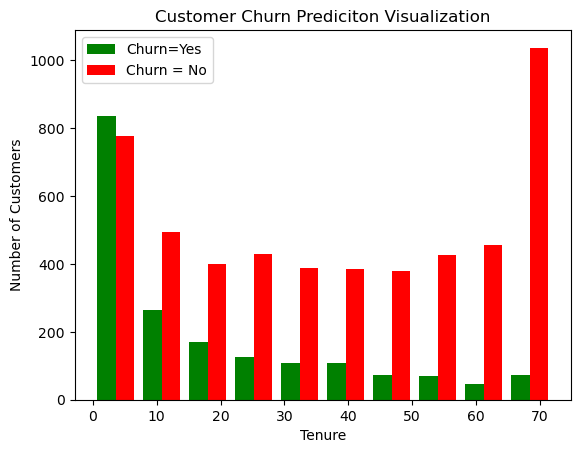

In [17]:
# Visualization
tenure_churn_no = df[df.Churn == 'No'].tenure #Customer that are not leaving
tenure_churn_yes = df[df.Churn =='Yes'].tenure #Customer that are leaving the company

plt.xlabel('Tenure')
plt.ylabel('Number of Customers')
plt.title('Customer Churn Prediciton Visualization')

plt.hist([tenure_churn_yes, tenure_churn_no], color = ['green', 'red'], label = ['Churn=Yes', 'Churn = No'])
plt.legend()
plt.show()
# We are exploring how many customers are loayl to the company

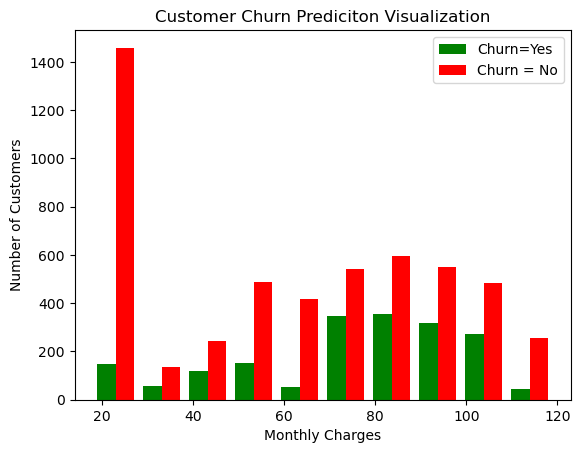

In [19]:
# Visualization
tenure_churn_no = df[df.Churn == 'No'].MonthlyCharges #Customer that are not leaving
tenure_churn_yes = df[df.Churn =='Yes'].MonthlyCharges

plt.xlabel('Monthly Charges')
plt.ylabel('Number of Customers')
plt.title('Customer Churn Prediciton Visualization')

plt.hist([tenure_churn_yes, tenure_churn_no], color = ['green', 'red'], label = ['Churn=Yes', 'Churn = No'])
plt.legend()
plt.show()

In [84]:
df = pd.read_csv('/Clustered_Dataset.csv')
df.sample(10)

,gender,SeniorCitizen,Dependents,tenure,PhoneService,MultipleLines,InternetService,Contract,MonthlyCharges,Churn,Cluster
5457,1,0,0,34,1,0,0,0,106,1,1
4850,0,0,0,70,1,0,1,1,90,0,1
6246,0,1,0,12,1,0,0,2,98,1,2
2349,0,0,1,11,0,1,1,2,36,0,0
5482,0,0,0,1,1,0,0,1,70,1,2
4696,0,0,0,1,1,0,1,2,45,0,0
5423,1,0,0,29,1,0,1,0,59,0,2
5841,0,1,0,66,1,0,0,1,101,0,1
3821,0,0,0,4,1,1,1,0,20,0,0
4184,1,0,0,24,1,1,1,0,50,0,0


In [85]:
# Lets explore the data types in our dataset
df.dtypes


gender             int64
SeniorCitizen      int64
Dependents         int64
tenure             int64
PhoneService       int64
MultipleLines      int64
InternetService    int64
Contract           int64
MonthlyCharges     int64
Churn              int64
Cluster            int64
dtype: object

In [86]:
# Import library sns
import seaborn as sns

In [87]:
def plot_boxplot(df, column_name):

  plt.figure(figsize=(5, 3))
  sns.boxplot(y=df[column_name])
  plt.title(f"Box Plot of {column_name}")
  plt.ylabel(column_name)
  plt.show

In [88]:
plot_boxplot(df, "tenure")


In [89]:
plot_boxplot(df, "MonthlyCharges")

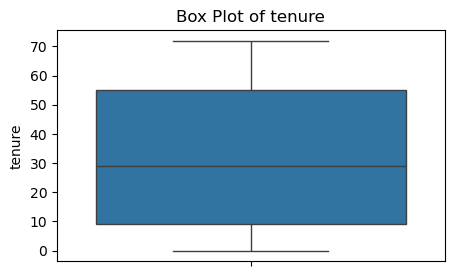

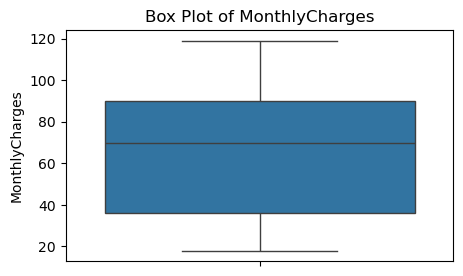

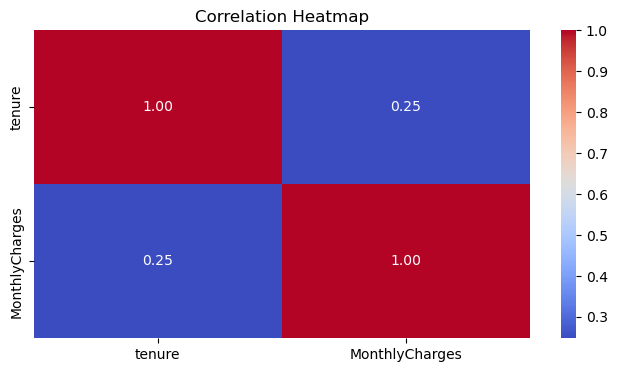

In [90]:
# correlation matrix - heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(df[["tenure", "MonthlyCharges"]].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [91]:
# Sacling-normalization (it will convert values into zero and one)
cols_to_scale = ['tenure', 'MonthlyCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

In [92]:
for col in df:
    print(f'{col}: {df[col].unique()}')

gender: [0 1]
SeniorCitizen: [0 1]
Dependents: [0 1]
tenure: [0.01388889 0.56944444 0.72222222 0.93055556 0.94444444 0.31944444
 1.         0.97222222 0.47222222 0.38888889 0.25       0.20833333
 0.15277778 0.51388889 0.30555556 0.63888889 0.70833333 0.06944444
 0.625      0.40277778 0.69444444 0.375      0.83333333 0.23611111
 0.45833333 0.91666667 0.95833333 0.79166667 0.11111111 0.19444444
 0.34722222 0.09722222 0.18055556 0.26388889 0.81944444 0.125
 0.04166667 0.13888889 0.54166667 0.75       0.48611111 0.16666667
 0.43055556 0.73611111 0.41666667 0.66666667 0.52777778 0.90277778
 0.33333333 0.55555556 0.59722222 0.98611111 0.84722222 0.36111111
 0.58333333 0.29166667 0.77777778 0.05555556 0.08333333 0.76388889
 0.02777778 0.61111111 0.86111111 0.875      0.68055556 0.27777778
 0.22222222 0.65277778 0.44444444 0.88888889 0.80555556 0.5
 0.        ]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: [0 1]
Contract: [0 1 2]
MonthlyCharges: [0.06930693 0.00990099 0.57425743 0.

In [93]:
X = df.drop('Churn', axis = 'columns')
y = df['Churn']


In [94]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)

In [95]:
X_train.shape


(5634, 10)

In [96]:
X_test.shape


(1409, 10)

In [97]:
X_train[:10]


,gender,SeniorCitizen,Dependents,tenure,PhoneService,MultipleLines,InternetService,Contract,MonthlyCharges,Cluster
5860,0,1,0,0.944444,1,0,1,0,0.782178,1
2458,1,0,1,0.541667,1,1,1,2,0.009901,3
5879,1,0,0,0.208333,1,0,0,2,0.306931,0
4708,1,0,0,0.486111,1,0,0,2,0.782178,1
1293,1,0,0,0.041667,1,1,1,2,0.554455,2
2242,1,0,0,0.722222,1,1,0,1,0.702970,1
1444,1,0,0,0.458333,1,0,1,2,0.623762,2
3269,1,0,0,0.805556,1,1,0,1,0.069307,3
101,0,0,1,0.236111,1,0,0,0,0.663366,2
4191,0,0,0,0.986111,1,1,1,0,0.079208,3


In [98]:
len(X_train.columns)


10

In [99]:
import tensorflow as tf
from tensorflow import keras


In [122]:
model = keras.Sequential([
    keras.layers.Dense(20, input_shape = (10,), activation = 'relu'),
    keras.layers.Dense(15, activation= 'relu'),
    keras.layers.Dense(10, activation= 'relu'),
    keras.layers.Dense (1, activation = 'sigmoid'),
    ])

In [123]:
model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

In [124]:
model.fit(X_train, y_train, epochs = 100)

Epoch 1/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7177 - loss: 0.6263
Epoch 2/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7293 - loss: 0.5539
Epoch 3/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7765 - loss: 0.4858
Epoch 4/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7921 - loss: 0.4542
Epoch 5/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7877 - loss: 0.4548
Epoch 6/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7875 - loss: 0.4492
Epoch 7/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7968 - loss: 0.4442
Epoch 8/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7943 - loss: 0.4420
Epoch 9/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7810 - loss: 0.4560
Epoch 10/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7784 - loss: 0.4499
Epoch 11/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7881 - loss: 0.4404
Epoch 12/100
177/177 ━━━━━━━━━━━━━━━━━━━━

In [105]:
model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_44 (Dense)                │ (None, 46)             │           506 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 36)             │         1,692 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_46 (Dense)                │ (None, 26)             │           962 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_47 (Dense)                │ (None, 1)              │            27 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,563 (37.36 KB)

 Trainable params: 3,187 (12.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,376 (24.91 KB)

In [106]:
model.evaluate(X_test, y_test)

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7734 - loss: 0.5054


[0.5067028999328613, 0.7728886008262634]

In [107]:
y_predict = model.predict(X_test)
y_predict[:5]

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


array([[0.16115841],
       [0.12287681],
       [0.01114607],
       [0.15407391],
       [0.9406416 ]], dtype=float32)

In [108]:
y_test [:10]

4213    0
5035    0
3713    0
1720    0
234     1
4558    0
40      1
3455    1
5944    0
1089    0
Name: Churn, dtype: int64

In [111]:
y_pred = []
for element in y_predict:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [112]:
y_pred[:10]

[0, 0, 0, 0, 1, 0, 1, 1, 0, 0]

In [113]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85      1025
           1       0.61      0.45      0.52       384

    accuracy                           0.77      1409
   macro avg       0.71      0.67      0.68      1409
weighted avg       0.76      0.77      0.76      1409



In [114]:
import tensorflow as tf
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

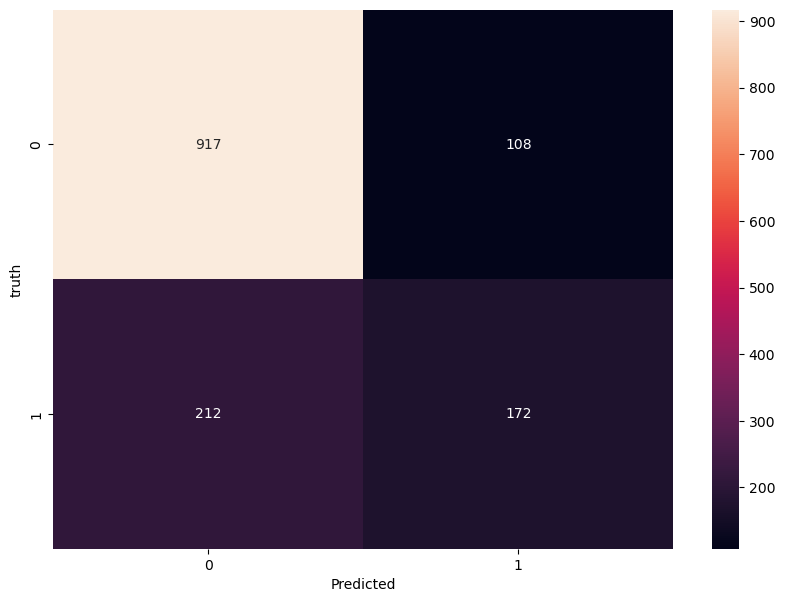

In [134]:
import seaborn as sns
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_pred)
#Confusion matrix
plt.figure(figsize = (10, 7))
sns.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('truth')
plt.show()

In [132]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Confusion matrix values
confusion_matrix = np.array([[7, 6],  # Actual class 0
                             [3, 4]]) # Actual class 1

# Extract TP, FP, FN, TN
TP_0, FP_1 = confusion_matrix[0, 0], confusion_matrix[0, 1]
FN_0, TP_1 = confusion_matrix[1, 0], confusion_matrix[1, 1]
TN_1, FN_1 = confusion_matrix[1, 1], confusion_matrix[0, 1]  

# Compute accuracy manually
total_samples = confusion_matrix.sum()
correct_predictions = TP_0 + TP_1  # True Positives for both classes
accuracy = correct_predictions / total_samples


In [127]:
print(f"Accuracy: {accuracy:.3f}")


Accuracy: 0.550


In [128]:
precision_0 = TP_0 / (TP_0 + FN_0)
precision_1 = TP_1 / (TP_1 + FP_1)

In [119]:
recall_0 = TP_0 / (TP_0 + FP_1)
recall_1 = TP_1 / (TP_1 + FN_0)

In [120]:
print(f"Precision for Class 0: {precision_0:.3f}")
print(f"Precision for Class 1: {precision_1:.3f}")
print(f"Recall for Class 0: {recall_0:.3f}")
print(f"Recall for Class 1: {recall_1:.3f}")


Precision for Class 0: 0.700
Precision for Class 1: 0.400
Recall for Class 0: 0.538
Recall for Class 1: 0.571
